In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdrashidulhaq","key":"1a65d01055e218da49e10d2f1329e731"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#permission for the json to act
!chmod 600~/.kaggle/kaggle.json

chmod: missing operand after ‘600~/.kaggle/kaggle.json’
Try 'chmod --help' for more information.


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tapakah68/facial-emotion-recognition

 97% 422M/433M [00:12<00:00, 30.2MB/s]
100% 433M/433M [00:12<00:00, 35.5MB/s]


In [ ]:
! unzip facial-emotion-recognition.zip

Archive:  facial-emotion-recognition.zip
  inflating: emotions.csv            
  inflating: images/0/Anger.jpg      
  inflating: images/0/Contempt.jpg   
  inflating: images/0/Disgust.jpg    
  inflating: images/0/Fear.jpg       
  inflating: images/0/Happy.jpg      
  inflating: images/0/Neutral.jpg    
  inflating: images/0/Sad.jpg        
  inflating: images/0/Surprised.jpg  
  inflating: images/1/Anger.jpg      
  inflating: images/1/Contempt.jpg   
  inflating: images/1/Disgust.jpg    
  inflating: images/1/Fear.jpg       
  inflating: images/1/Happy.jpg      
  inflating: images/1/Neutral.jpg    
  inflating: images/1/Sad.jpg        
  inflating: images/1/Surprised.jpg  
  inflating: images/10/Anger.jpg     
  inflating: images/10/Contempt.jpg  
  inflating: images/10/Disgust.jpg   
  inflating: images/10/Fear.jpg      
  inflating: images/10/Happy.jpg     
  inflating: images/10/Neutral.jpg   
  inflating: images/10/Sad.jpg       
  inflating: images/10/Surprised.jpg  
  inflat

In [ ]:
facial-emotion-recognition

NameError: ignored

In [ ]:
!unzip -q facial-emotion-recognition.zip -d dataset/

In [ ]:
import os
data1 = 'dataset'
os.listdir(data1)

['images', 'emotions.csv']

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

In [ ]:
files=os.listdir('dataset/images/0')
emotions=[]
for f in  files:
    emotions+=[f.split('.')[0]]
class_names=sorted(emotions)
!mkdir images
for emo in emotions:
    !mkdir images/{emo}
!ls images

mkdir: cannot create directory ‘images’: File exists
0  10  12  14  16  18  3  5  7	9      Contempt  Fear	Neutral  Surprised
1  11  13  15  17  2   4  6  8	Anger  Disgust	 Happy	Sad


In [ ]:
for dirname, _, filenames in os.walk('dataset/images'):
    for filename in filenames:
        path=os.path.join(dirname, filename)
        emo=filename.split('.')[0]
        idi=dirname.split('/')[-1]
        newfile=idi+'_'+filename
        !cp {path} {os.path.join('images',emo,newfile)}

In [ ]:
tpath = '/working/images'

In [ ]:
tpath = 'dataset/working/images'

In [ ]:
training_data = keras.preprocessing.image_dataset_from_directory(
    tpath,
    batch_size = 4,
    image_size =(351,351),

    shuffle = True,
    seed =123,
    subset ='training',
    validation_split=0.2
    )
validation_data =keras.preprocessing.image_dataset_from_directory(
    tpath,
    batch_size = 4,
    image_size =(351,351),

    shuffle = True,
    seed =123,
    validation_split =0.2,
    subset ='validation'

    )

NotFoundError: ignored

#Face Recognition Pytorch Lightning CNN

In [ ]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torch.utils.data import DataLoader, Dataset, Subset
from torch.utils.data import random_split, SubsetRandomSampler
from torchvision import datasets, transforms, models
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from pytorch_lightning import LightningModule
from pytorch_lightning import Trainer
import pytorch_lightning as pl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image

In [ ]:
!pip install git+https://github.com/PyTorchLightning/pytorch-lightning
import pytorch_lightning as pl
print(pl.__version__)

  Cloning https://github.com/PyTorchLightning/pytorch-lightning to /tmp/pip-req-build-7vfl23ug
  Running command git clone --filter=blob:none --quiet https://github.com/PyTorchLightning/pytorch-lightning /tmp/pip-req-build-7vfl23ug
  Resolved https://github.com/PyTorchLightning/pytorch-lightning to commit 451226508cb72b42fd9588ea6d5d1c4a2bbbb4e3
  Running command git submodule update --init --recursive -q
  Encountered 31 file(s) that should have been pointers, but weren't:
        .notebooks/course_UvA-DL/01-introduction-to-pytorch.ipynb
        .notebooks/course_UvA-DL/02-activation-functions.ipynb
        .notebooks/course_UvA-DL/03-initialization-and-optimization.ipynb
        .notebooks/course_UvA-DL/04-inception-resnet-densenet.ipynb
        .notebooks/course_UvA-DL/05-transformers-and-MH-attention.ipynb
        .notebooks/course_UvA-DL/06-graph-neural-networks.ipynb
        .notebooks/course_UvA-DL/07-deep-energy-based-generative-models.ipynb
        .notebooks/course_UvA-DL/08-

In [ ]:
print(pl.__version__)

2.0.8


In [ ]:
transform=transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

In [ ]:
dataset0=datasets.ImageFolder(root="dataset/images",transform=None)

class_names0=dataset0.classes
class_names=[]
for i in range(19):
    class_names+=[str(i)]
print(class_names)
print(len(class_names))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']
19


In [ ]:
class DataModule(pl.LightningDataModule):

    def __init__(self, transform=transform, batch_size=32):
        super().__init__()
        self.root_dir = "dataset/images"
        self.transform = transform
        self.batch_size = batch_size

    def setup(self, stage=None):
        dataset = datasets.ImageFolder(root=self.root_dir, transform=self.transform)
        n_data = len(dataset)
        n_train = int(0.33 * n_data)
        n_valid = int(0.33 * n_data)
        n_test = n_data - n_train - n_valid

        train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [n_train, n_valid, n_test])

        self.train_dataset = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        self.val_dataset = DataLoader(val_dataset, batch_size=self.batch_size)
        self.test_dataset = DataLoader(test_dataset, batch_size=self.batch_size)

    def train_dataloader(self):
        return self.train_dataset

    def val_dataloader(self):
        return self.val_dataset

    def test_dataloader(self):
        return self.test_dataset

In [ ]:
class ConvolutionalNetwork(LightningModule):

    def __init__(self):
        super(ConvolutionalNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(16 * 54 * 54, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 20)
        self.fc4 = nn.Linear(20, len(class_names))

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 16 * 54 * 54)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = self.fc4(X)
        return F.log_softmax(X, dim=1)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        X, y = train_batch
        y_hat = self(X)
        loss = F.cross_entropy(y_hat, y)
        pred = y_hat.argmax(dim=1, keepdim=True)
        acc = pred.eq(y.view_as(pred)).sum().item() / y.shape[0]
        self.log("train_loss", loss)
        self.log("train_acc", acc)
        return loss

    def validation_step(self, val_batch, batch_idx):
        X, y = val_batch
        y_hat = self(X)
        loss = F.cross_entropy(y_hat, y)
        pred = y_hat.argmax(dim=1, keepdim=True)
        acc = pred.eq(y.view_as(pred)).sum().item() / y.shape[0]
        self.log("val_loss", loss)
        self.log("val_acc", acc)

    def test_step(self, test_batch, batch_idx):
        X, y = test_batch
        y_hat = self(X)
        loss = F.cross_entropy(y_hat, y)
        pred = y_hat.argmax(dim=1, keepdim=True)
        acc = pred.eq(y.view_as(pred)).sum().item() / y.shape[0]
        self.log("test_loss", loss)
        self.log("test_acc", acc)


In [ ]:
if __name__ == '__main__':
    datamodule = DataModule()
    datamodule.setup()
    model = ConvolutionalNetwork()
    trainer = pl.Trainer(max_epochs=3)
    trainer.fit(model, datamodule)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type   | Params
---------------------------------
0 | conv1 | Conv2d | 168   
1 | conv2 | Conv2d | 880   
2 | fc1   | Linear | 5.6 M 
3 | fc2   | Linear | 10.2 K
4 | fc3   | Linear | 1.7 K 
5 | fc4   | Linear | 399   
---------------------------------
5.6 M     Trainable params
0         Non-trainable params
5.6 M     Total params
22.449    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [ ]:
    datamodule.setup(stage='test')
    test_loader = datamodule.test_dataloader()
    trainer.test(dataloaders=test_loader)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:149: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/lightning_logs/version_1/checkpoints/epoch=2-step=6.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/lightning_logs/version_1/checkpoints/epoch=2-step=6.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.21153846383094788    │
│         test_loss         │     2.72375226020813      │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 2.72375226020813, 'test_acc': 0.21153846383094788}]

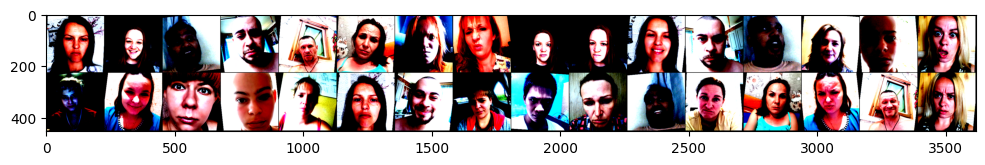

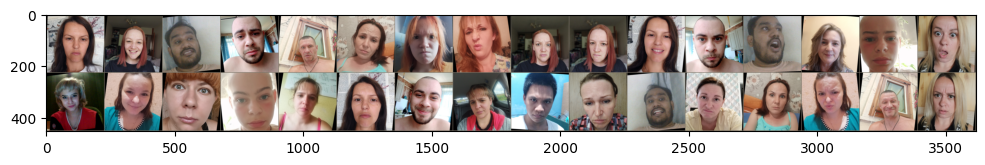

In [ ]:
for images, labels in datamodule.train_dataloader():
    break
im=make_grid(images,nrow=16)

plt.figure(figsize=(12,12))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

inv_normalize=transforms.Normalize(mean=[-0.485/0.229,-0.456/0.224,-0.406/0.225],
                                   std=[1/0.229,1/0.224,1/0.225])
im=inv_normalize(im)

plt.figure(figsize=(12,12))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [ ]:
device = torch.device("cpu")   #"cuda:0"

model.eval()
y_true=[]
y_pred=[]
with torch.no_grad():
    for test_data in datamodule.test_dataloader():
        test_images, test_labels = test_data[0].to(device), test_data[1].to(device)
        pred = model(test_images).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())

print(classification_report(y_true,y_pred,target_names=class_names,digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         3
           1     0.1000    1.0000    0.1818         2
           2     0.0000    0.0000    0.0000         2
           3     0.7500    0.7500    0.7500         4
           4     0.0000    0.0000    0.0000         2
           5     0.0000    0.0000    0.0000         4
           6     0.0000    0.0000    0.0000         2
           7     0.0000    0.0000    0.0000         1
           8     0.0000    0.0000    0.0000         3
           9     0.0000    0.0000    0.0000         5
          10     0.2500    0.5000    0.3333         2
          11     0.0000    0.0000    0.0000         4
          12     0.0000    0.0000    0.0000         1
          13     0.0000    0.0000    0.0000         3
          14     0.0476    1.0000    0.0909         1
          15     0.0000    0.0000    0.0000         5
          16     1.0000    1.0000    1.0000         2
          17     0.0000    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
